In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from linecache import getline
from gurobipy import Model, GRB, quicksum

In [2]:
def parseNumVehicles(line):
    x = re.findall(r"No of trucks: [0-9]", line)
    return int(x[0][-1])

def parseForNum(line):
    x = re.findall(r"[0-9]+", line)
    return int(x[0])

def parseCoords(line):
    x = line.split()
    return [int(x[1]), int(x[2])]

def parseDemand(line):
    x = line.split()
    return [int(x[0]), int(x[1])]

In [3]:
COORD_FLAG = False
DEMAND_FLAG = False
xc = []
yc = []
q = {}
     
fh = open("../Instances/Instances/A-n32-k5.txt", 'r')
for i,line in enumerate(fh):
    if "CAPACITY" in line:
        Q = parseForNum(line)
    elif "COMMENT" in line:
        p = parseNumVehicles(line)
    elif "DIMENSION" in line:
        n = int(parseForNum(line)) - 1 # number of clients
    elif "NODE_COORD_SECTION" in line:
        COORD_FLAG = True
    elif "DEMAND_SECTION" in line:
        COORD_FLAG = False
        DEMAND_FLAG = True
    elif "DEPOT_SECTION" in line:
        DEMAND_FLAG = False
        print()
    elif COORD_FLAG:
        coord = parseCoords(line)
        xc.append(coord[0])
        yc.append(coord[1])
    elif DEMAND_FLAG:
        demand = parseDemand(line)
        q[demand[0]] = demand[1]
fh.close()

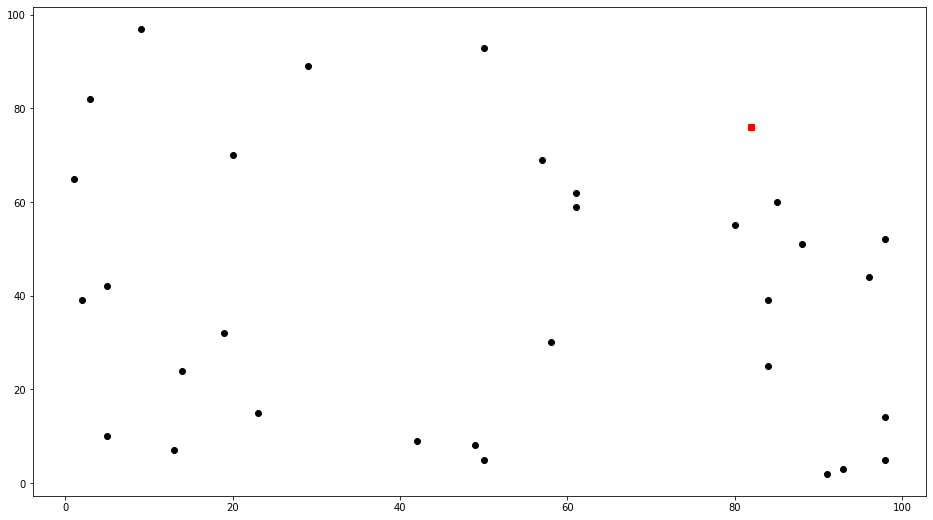

In [4]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='black')

In [5]:
# Number of clients
N = [i for i in range(1, n+1)] 

# Number of nodes (including depot)
V = [0] + N 

# Arcs
A = [(i, j) for i in V for j in V] 

# Cost
c = {(i, j): np.hypot(xc[i] - xc[j], yc[i] - yc[j]) for i, j in A}

In [6]:
mdl = Model('CVRP')

Academic license - for non-commercial use only - expires 2021-03-18
Using license file C:\Users\BigBadBraddy\gurobi.lic


## Variables

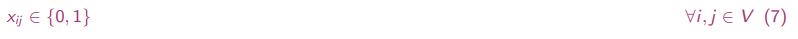

In [7]:
x = mdl.addVars(A, vtype=GRB.CONTINUOUS)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)
mdl.update()

## Objective Function

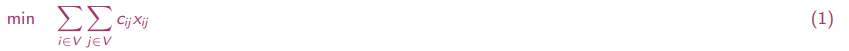

In [8]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(c[i, j] * x[i, j] for i, j in A))
mdl.update()

## Constraint 1

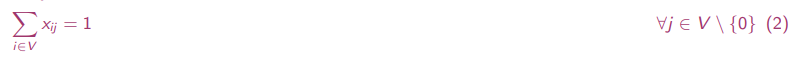

In [9]:
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.update()

## Constraint 2

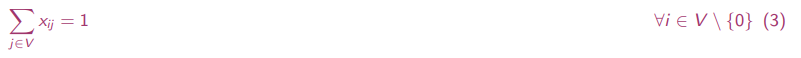

In [10]:
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.update()

## Constraint 3

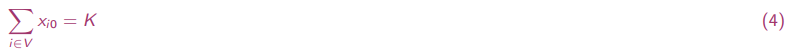

In [11]:
mdl.addConstr(quicksum(x[i, 0] for i in V) == p)
mdl.update()

## Constraint 4

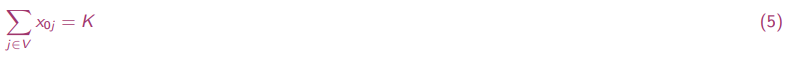

In [12]:
mdl.addConstr(quicksum(x[0, j] for j in V) == p)
mdl.update()

## Constraint 5

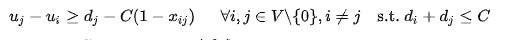

In [13]:
mdl.addConstrs((u[j] - u[i]) >= (q[j] - Q*(1 - x[i, j])) for i in N for j in N if i != j)
mdl.update()

## Constraint 6

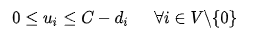

In [14]:
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)
mdl.update()

In [15]:
# mdl.Params.MIPGap = 0.1
# mdl.Params.TimeLimit = 540  # seconds
# mdl.setParam("MIPFocus", 3);
# mdl.setParam("Cut", -1);
# mdl.setParam("Heuristics", 1);
mdl.optimize()

#760s
#40s

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1056 rows, 1055 columns and 4838 nonzeros
Model fingerprint: 0x4fd11f4a
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 63 rows and 32 columns
Presolve time: 0.01s
Presolved: 993 rows, 1023 columns, 4743 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.200000e+01   0.000000e+00      0s
     100    3.6189019e+02   0.000000e+00   0.000000e+00      0s

Solved in 100 iterations and 0.01 seconds
Optimal objective  3.618901861e+02


In [16]:
# active_arcs = [a for a in A if x[a].x > 0.99]
# non_active_arcs = [a for a in A if x[a].x <= 0.99]

active_arcs = []
non_active_arcs = []

for a in A:
    if x[a].x > 0.99:
        active_arcs.append(a)
    else:
        non_active_arcs.append(a)
        
print(x)

{(0, 0): <gurobi.Var C0 (value 5.0)>, (0, 1): <gurobi.Var C1 (value 0.0)>, (0, 2): <gurobi.Var C2 (value 0.0)>, (0, 3): <gurobi.Var C3 (value 0.0)>, (0, 4): <gurobi.Var C4 (value 0.0)>, (0, 5): <gurobi.Var C5 (value 0.0)>, (0, 6): <gurobi.Var C6 (value 0.0)>, (0, 7): <gurobi.Var C7 (value 0.0)>, (0, 8): <gurobi.Var C8 (value 0.0)>, (0, 9): <gurobi.Var C9 (value 0.0)>, (0, 10): <gurobi.Var C10 (value 0.0)>, (0, 11): <gurobi.Var C11 (value 0.0)>, (0, 12): <gurobi.Var C12 (value 0.0)>, (0, 13): <gurobi.Var C13 (value 0.0)>, (0, 14): <gurobi.Var C14 (value 0.0)>, (0, 15): <gurobi.Var C15 (value 0.0)>, (0, 16): <gurobi.Var C16 (value 0.0)>, (0, 17): <gurobi.Var C17 (value 0.0)>, (0, 18): <gurobi.Var C18 (value 0.0)>, (0, 19): <gurobi.Var C19 (value 0.0)>, (0, 20): <gurobi.Var C20 (value 0.0)>, (0, 21): <gurobi.Var C21 (value 0.0)>, (0, 22): <gurobi.Var C22 (value 0.0)>, (0, 23): <gurobi.Var C23 (value 0.0)>, (0, 24): <gurobi.Var C24 (value 0.0)>, (0, 25): <gurobi.Var C25 (value 0.0)>, (0, 2

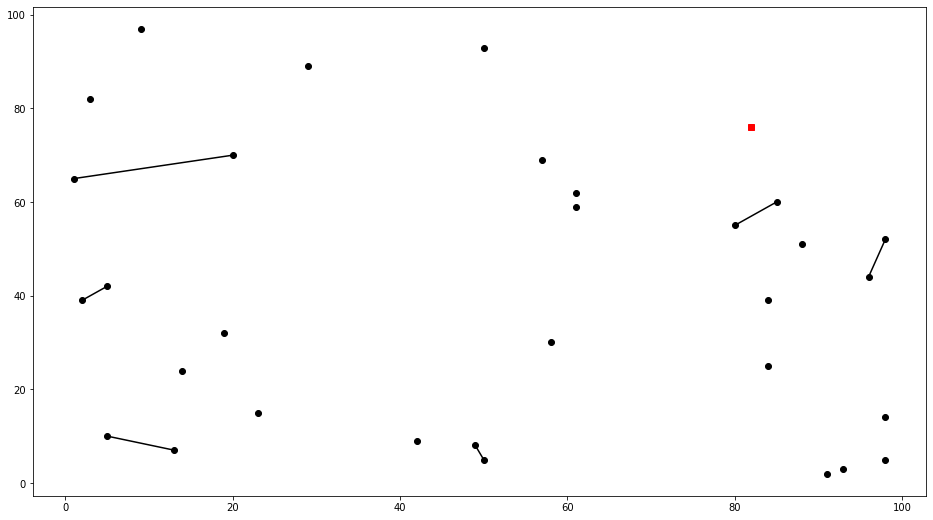

In [17]:
plt.rcParams["figure.figsize"] = [16,9]

for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='black', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='black')

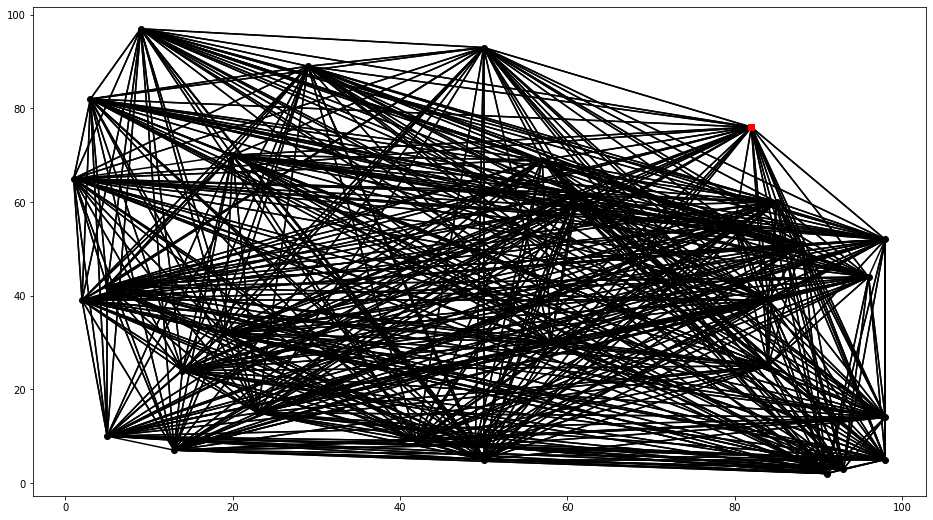

In [18]:
plt.rcParams["figure.figsize"] = [16,9]

for i, j in non_active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='black', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='black')

In [19]:
mdl.printStats()


Statistics for model CVRP :
  Linear constraint matrix    : 1056 Constrs, 1055 Vars, 4838 NZs
  Matrix coefficient range    : [ 1, 100 ]
  Objective coefficient range : [ 2.23607, 128.004 ]
  Variable bound range        : [ 0, 0 ]
  RHS coefficient range       : [ 1, 100 ]
